# **1 - Perkenalan**

---



Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Andik Al Fauzi

Batch : FTDS-RMT-018

Dataset : [heart-attack-possibility](https://github.com/H8-Assignments-Bay/p1-ftds018-rmt-lc2-andik-alfauzi/blob/main/heart-attack-possibility.csv)

Objective : Mampu memahami konsep ensemble learning dengan menggunakan Decision Tree dan Random Forest serta menerapkannya dengan menggunakan Dataset serta mengimplementasikannya dengan membuat prediksi sesuai dari instruksi di [Live Code 2 - Phase 1](https://github.com/H8-Assignments-Bay/p1-ftds018-rmt-lc2-andik-alfauzi)

# **2 - Import Libraries**

---



Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [234]:
# Importing libraries
import pandas as pd
import numpy as np

# Model Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Model Preprocessing libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Importing Libraries
import pickle
import json

# Warning Library
import warnings
warnings.filterwarnings('ignore')

# **3 - Data Loading**

---



Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [117]:
# Load dataset
data = pd.read_csv('/content/heart-attack-possibility.csv')

# Copy dataset to make sure the original is untouchable
copyData = data.copy()

# Display dataset
copyData

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,Downsloping,0.0,Fixed defect,1
1,37,Male,2,130,250,0,1,187,0,3.5,Downsloping,0.0,Normal,1
2,41,Female,1,130,204,0,0,172,0,1.4,Upsloping,0.0,Normal,1
3,56,Male,1,120,236,0,1,178,0,0.8,Upsloping,0.0,Normal,1
4,57,Female,0,120,354,0,1,163,1,0.6,Upsloping,0.0,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,Flat,0.0,Reversible defect,0
299,45,Male,3,110,264,0,1,132,0,1.2,Flat,0.0,Reversible defect,0
300,68,Male,0,144,193,1,1,141,0,3.4,Flat,2.0,Reversible defect,0
301,57,Male,0,130,131,0,1,115,1,1.2,Flat,1.0,Reversible defect,0


Ada 303 baris data dengan 14 column

# **4 - Exploratory Data Analysis (EDA)**

---

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.



In [118]:
# Check dataset info
copyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        298 non-null    float64
 12  thal      301 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


Ada 11 data bertipe numerik dan 3 data bertipe categorical

In [119]:
# Check missing value
copyData.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

data di column `ca` dan `thal` ada missing value yang akan di handle kemudian

In [120]:
copyData.sex.value_counts()

Male      207
Female     96
Name: sex, dtype: int64

data male total ada 207 orang dengan female ada 96 orang

## 4.1 - Berdasarkan informasi dari PennMedicine, dibawah ini adalah kategori mengenal tingkat kolesterol seseorang.

1. healthy : < 200

2. at risk : 200 - 240

3. dangerous : ≥ 240

In [121]:
# Chol < 200
copyData.groupby(copyData['chol'] < 200)['sex'].value_counts()

chol   sex   
False  Male      171
       Female     82
True   Male       36
       Female     14
Name: sex, dtype: int64

Data dengan kadar `chol` healthy kadar < 200 ada sebanyak 36 untuk Male dan 14 untuk Female

In [122]:
# chol >= 200 < 240
copyData.groupby((copyData['chol'] >= 200) & (copyData['chol'] < 240))['sex'].value_counts()

chol   sex   
False  Male      133
       Female     72
True   Male       74
       Female     24
Name: sex, dtype: int64

Data dengan kadar `chol` at-risk dengan kadar 200 - 240 ada sebanyak 74 untuk Male dan 24 untuk Female

In [123]:
# chol >=240
copyData.groupby(copyData['chol'] >= 240)['sex'].value_counts()

chol   sex   
False  Male      110
       Female     38
True   Male       97
       Female     58
Name: sex, dtype: int64

Data dengan kadar `chol` dangerous dengan kadar >= 240 ada sebanyak 97 untuk Male dan 58 untuk Female

## 4.2 - Lakukan perbandingan antara jumlah denyut nadi maksimal seseorang yang pernah terekam dengan jumlah denyut nadi maksimal yang seharusnya dengan panduan dibawah ini :

Data mengenai jumlah denyut nadi maksimal seseorang yang pernah terekam dapat menggunakan kolom thalach.

Data mengenai jumlah denyut nadi maksimal yang seharusnya, dapat mengikut langkah-langkah dibawah ini :

Formula : 220 - usia seseorang.

Buat kolom baru berdasarkan formula diatas mengenai jumlah denyut nadi maksimal yang seharusnya.

Beri nama kolom ini dengan max_heart_rate.

Note : kolom baru (max_heart_rate) ini tidak perlu diikutsertakan dalam pembentukan model

Bandingkan antara thalach dan max_heart_rate dengan kemungkinan seseorang terkena serangan jantung. Lakukan analisa terhadap hasil ini !

In [124]:
# Find value of formula of thalach
copyData['max_heart_rate'] = 220 - copyData['age']
copyData.loc[:, ['thalach', 'max_heart_rate']]
copyData['diff'] = copyData['max_heart_rate'] - copyData['thalach']
copyData.loc[:, ['thalach', 'max_heart_rate', 'diff']]

# Display diff <= -2
copyData.loc[copyData['diff'] <= -2]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,max_heart_rate,diff
1,37,Male,2,130,250,0,1,187,0,3.5,Downsloping,0.0,Normal,1,183,-4
3,56,Male,1,120,236,0,1,178,0,0.8,Upsloping,0.0,Normal,1,164,-14
9,57,Male,2,150,168,0,1,174,0,1.6,Upsloping,0.0,Normal,1,163,-11
16,58,Female,2,120,340,0,1,172,0,0.0,Upsloping,0.0,Normal,1,162,-10
21,44,Male,2,130,233,0,1,179,1,0.4,Upsloping,0.0,Normal,1,176,-3
25,71,Female,1,160,302,0,1,162,0,0.4,Upsloping,2.0,Normal,1,149,-13
28,65,Female,2,140,417,1,0,157,0,0.8,Upsloping,1.0,Normal,1,155,-2
32,44,Male,1,130,219,0,0,188,0,0.0,Upsloping,0.0,Normal,1,176,-12
36,54,Female,2,135,304,1,1,170,0,0.0,Upsloping,0.0,Normal,1,166,-4
41,48,Male,1,130,245,0,0,180,0,0.2,Flat,0.0,Normal,1,172,-8


Berikut adalah selisih antara `thalach` dengan `max_heart_rate` dibawah -2 yang berarti ada kemungkinan seseorang terkena serangan jantung karena `max_heart_rate` nya lebih tinggi dibanding dengan tekanan denyut nadinya

In [125]:
# Find diff >= 2
copyData.loc[copyData['diff'] >= 2]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,max_heart_rate,diff
0,63,Male,3,145,233,1,0,150,0,2.3,Downsloping,0.0,Fixed defect,1,157,7
2,41,Female,1,130,204,0,0,172,0,1.4,Upsloping,0.0,Normal,1,179,7
5,57,Male,0,140,192,0,1,148,0,0.4,Flat,0.0,Fixed defect,1,163,15
6,56,Female,1,140,294,0,0,153,0,1.3,Flat,0.0,Normal,1,164,11
7,44,Male,1,120,263,0,1,173,0,0.0,Upsloping,0.0,Reversible defect,1,176,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,Male,0,164,176,1,0,90,0,1.0,Flat,2.0,Fixed defect,0,161,71
298,57,Female,0,140,241,0,1,123,1,0.2,Flat,0.0,Reversible defect,0,163,40
299,45,Male,3,110,264,0,1,132,0,1.2,Flat,0.0,Reversible defect,0,175,43
300,68,Male,0,144,193,1,1,141,0,3.4,Flat,2.0,Reversible defect,0,152,11


Berikut adalah selisih antara `thalach` dengan `max_heart_rate` diatas 2 yang berarti ada kemungkinan seseorang terkena serangan jantung karena `max_heart_rate` nya lebih rendah dibanding dengan tekanan denyut nadinya, yang kemungkinan adanya penyumbatan didalam pembuluh darahnya

# **5. Data Preprocessing**

---

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## 5.1 Split between X and y

In [126]:
# Split data
X = copyData.drop(['target'], axis=1)
y = copyData['target']

# Display
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,max_heart_rate,diff
0,63,Male,3,145,233,1,0,150,0,2.3,Downsloping,0.0,Fixed defect,157,7
1,37,Male,2,130,250,0,1,187,0,3.5,Downsloping,0.0,Normal,183,-4
2,41,Female,1,130,204,0,0,172,0,1.4,Upsloping,0.0,Normal,179,7
3,56,Male,1,120,236,0,1,178,0,0.8,Upsloping,0.0,Normal,164,-14
4,57,Female,0,120,354,0,1,163,1,0.6,Upsloping,0.0,Normal,163,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,Flat,0.0,Reversible defect,163,40
299,45,Male,3,110,264,0,1,132,0,1.2,Flat,0.0,Reversible defect,175,43
300,68,Male,0,144,193,1,1,141,0,3.4,Flat,2.0,Reversible defect,152,11
301,57,Male,0,130,131,0,1,115,1,1.2,Flat,1.0,Reversible defect,163,48


## 5.2 Missing Value Handling

In [127]:
# Check missing value data X
print('Missing Value didata Fitur  : \n', X.isnull().sum())
print('')
print('Missing Value didata Target : ', y.isnull().sum())

Missing Value didata Fitur  : 
 age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
ca                5
thal              2
max_heart_rate    0
diff              0
dtype: int64

Missing Value didata Target :  0


Missing value ada di data fitur saja yaitu di kolom `ca` ada 5 dan kolom `thal` ada 5, yang akan dihandle dengan menggunakan mean 

In [141]:
# Missing value with mean
mean_ca = X['ca'].mean()
mode_thal = X['thal'].mode()[0]

# imputing
X['ca'].fillna(mean_ca, inplace=True)
X['thal'].fillna(mode_thal, inplace=True)

# Display
print('Missing Value didata Fitur  : \n', X.isnull().sum())

Missing Value didata Fitur  : 
 age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
ca                0
thal              0
max_heart_rate    0
diff              0
dtype: int64


Missing value berhasil di handling

## 5.3 Split data for Train-set and Test-set

In [142]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# Check shape after split
print('Shape of X_train :', X_train.shape)
print('Shape of X_test  :', X_test.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of y_test  :', y_test.shape)

Shape of X_train : (242, 15)
Shape of X_test  : (61, 15)
Shape of y_train : (242,)
Shape of y_test  : (61,)


Data X_Train 80% dengan jumlah 242 baris dan 15 kolom data. Data X_test dengan jumlah 61 baris dan 15 kolom data, sedangkan data y_train 20% dengan jumlah 242 dan data y_test dengan jumlah 61

## 5.4 Outlier Handling

In [143]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   sex             303 non-null    object 
 2   cp              303 non-null    int64  
 3   trestbps        303 non-null    int64  
 4   chol            303 non-null    int64  
 5   fbs             303 non-null    int64  
 6   restecg         303 non-null    int64  
 7   thalach         303 non-null    int64  
 8   exang           303 non-null    int64  
 9   oldpeak         303 non-null    float64
 10  slope           303 non-null    object 
 11  ca              303 non-null    float64
 12  thal            303 non-null    object 
 13  max_heart_rate  303 non-null    int64  
 14  diff            303 non-null    int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [144]:
# Define function outlier visualization
def diagnosticVis(df, variable):
  plt.figure(figsize = (15, 6))

  # Histogram 
  plt.subplot(1, 2, 1)
  sns.histplot(df[variable], bins=30)
  plt.title('Histogram '+variable)

  # Boxplot
  plt.subplot(1, 2, 2)
  sns.boxplot(y = df[variable])
  plt.title('Boxplot '+variable)

  plt.show()

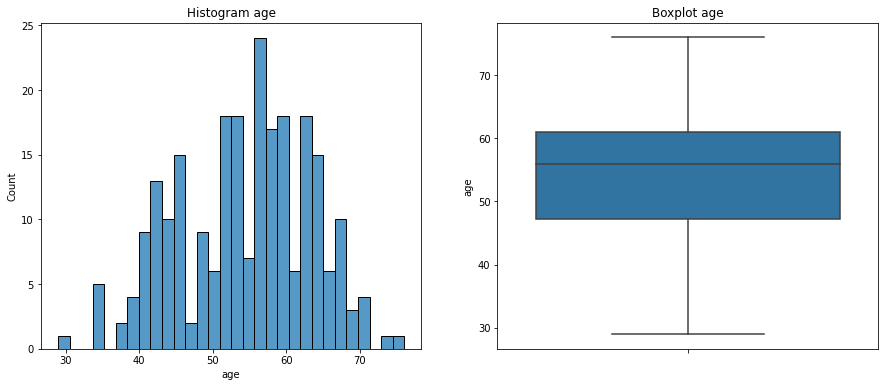

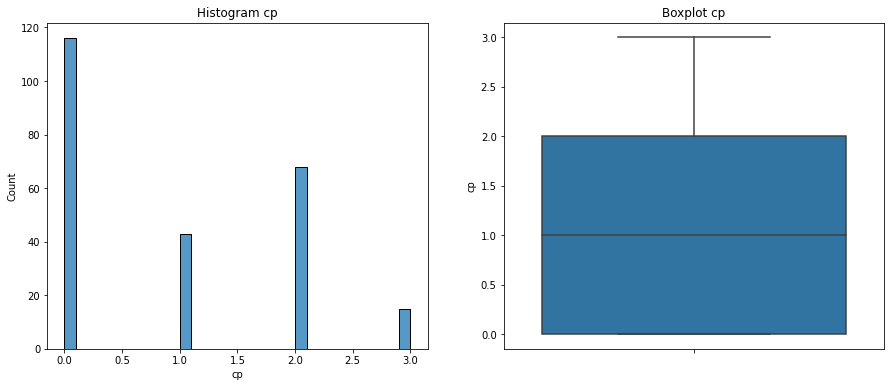

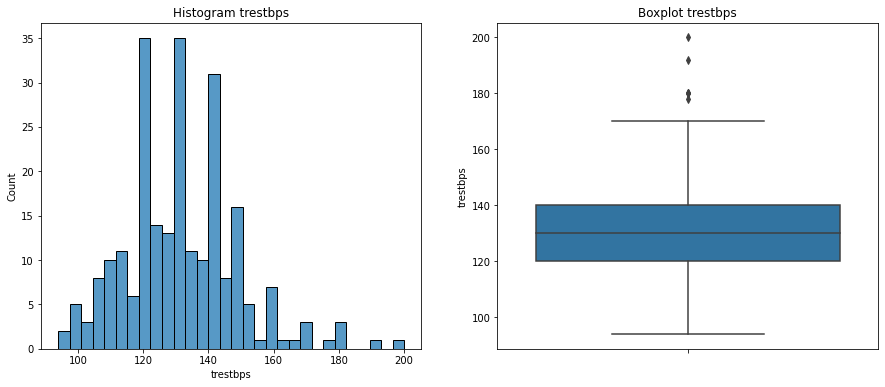

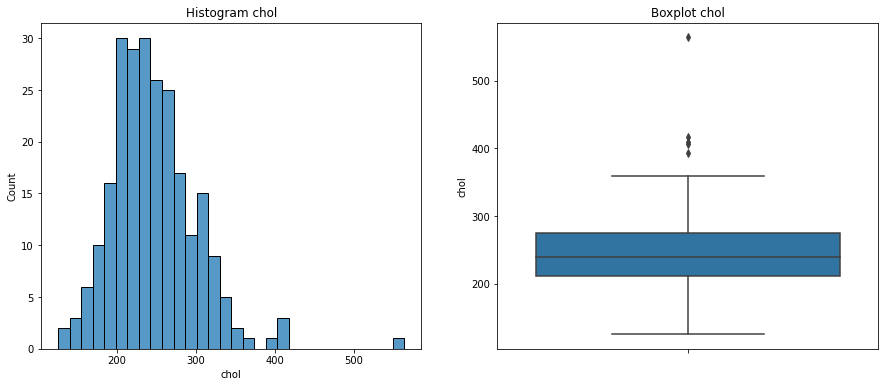

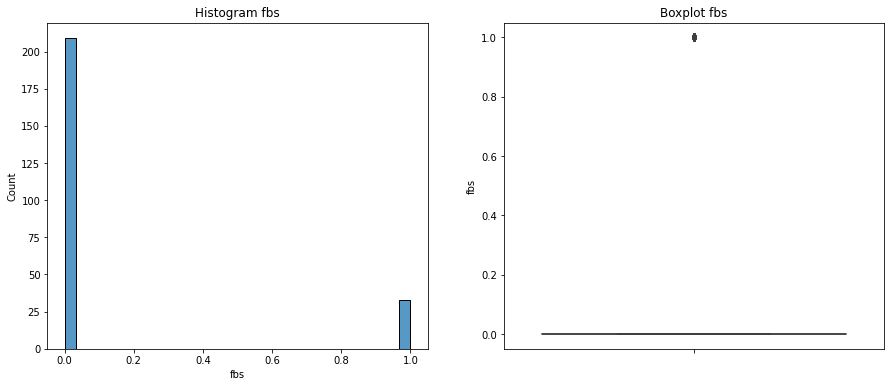

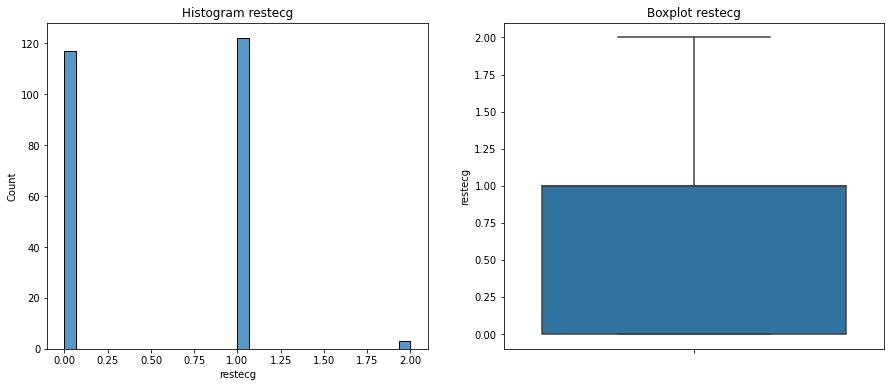

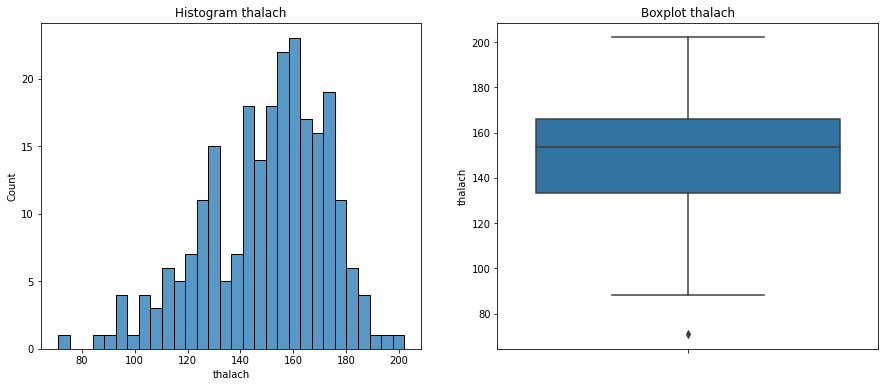

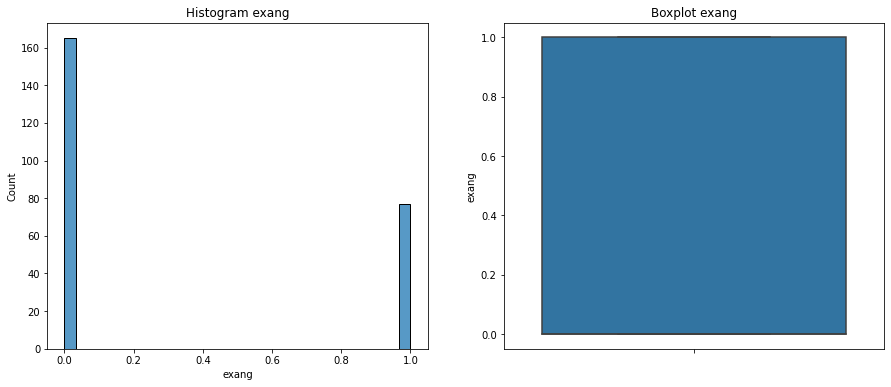

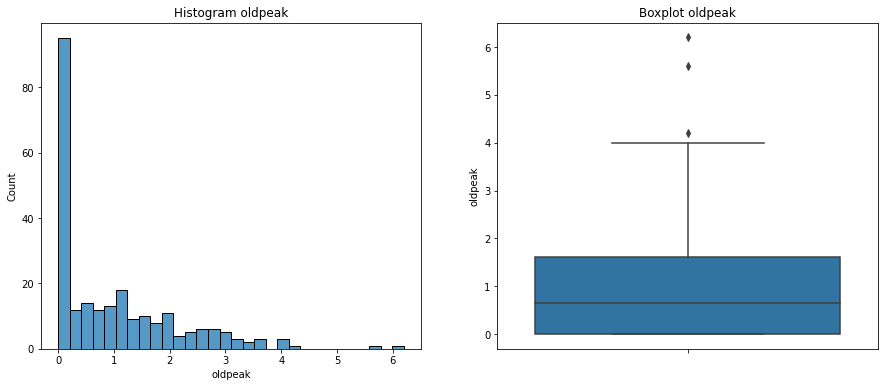

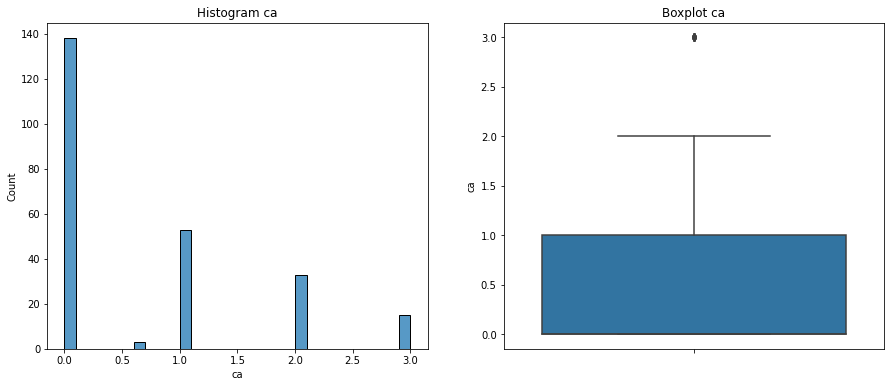

In [145]:
# outlier visualization
diagnosticVis(X_train, 'age')
diagnosticVis(X_train, 'cp')
diagnosticVis(X_train, 'trestbps')
diagnosticVis(X_train, 'chol')
diagnosticVis(X_train, 'fbs')
diagnosticVis(X_train, 'restecg')
diagnosticVis(X_train, 'thalach')
diagnosticVis(X_train, 'exang')
diagnosticVis(X_train, 'oldpeak')
diagnosticVis(X_train, 'ca')

ada data-data oulier berdasarkan visualisasi diatas, tetapi saya tidak menghandlenya karena saya berasumsi karena memang ada orang yang memiliki kadar-kadar colesterol dan sebagainya diatas batas normal dan bahkan cenderung lebih tinggi dibanding denga yang lain

## 5.5 Feature Selection

In [146]:
# Droping unnecessary column
X_train.drop(['max_heart_rate', 'diff'], axis=1, inplace=True)
X_test.drop(['max_heart_rate', 'diff'], axis=1, inplace=True)

Saya akan menggunakan semua kolom didataset karena saya berasumsi semua datanya memiliki nilai penting untuk permodelan nantinya kecuali 'max_heart_rate', 'diff' karena kedua data tersebut hanya digunakan untuk EDA

## 5.6 Split between Numerical and Categorical

In [147]:
# Split between numerical and categorical
numCol = X_train.select_dtypes(include = np.number).columns.tolist()
catCol = X_train.select_dtypes(include = ['object']).columns.tolist()

# Display
print('Numerical Data   : ', numCol)
print('Categorical Data : ', catCol)

Numerical Data   :  ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca']
Categorical Data :  ['sex', 'slope', 'thal']


In [148]:
# Split Train-set and Test-set into numerical
X_trainNum = X_train[numCol]
X_testNum = X_test[numCol]

# Split Train-set and Test-set into categorical
X_trainCat = X_train[catCol]
X_testCat = X_test[catCol]

Berikut pembagian antara data numerical dan categorical

## 5.7 Feature Scaling

In [149]:
# Scaling data with MinMaxScaling
# Function scaler
scaler = MinMaxScaler()
scaler.fit(X_trainNum)

# Apply scaling
X_trainScaled = scaler.transform(X_trainNum)
X_testScaled = scaler.transform(X_testNum)

# Display 
X_trainScaled

array([[0.59574468, 0.66666667, 0.32075472, ..., 0.        , 0.06451613,
        0.33333333],
       [0.57446809, 1.        , 0.24528302, ..., 0.        , 0.30645161,
        0.        ],
       [0.63829787, 0.        , 0.43396226, ..., 1.        , 0.        ,
        0.33333333],
       ...,
       [0.40425532, 0.        , 0.28301887, ..., 0.        , 0.08064516,
        0.        ],
       [0.74468085, 0.        , 0.81132075, ..., 1.        , 0.        ,
        0.        ],
       [0.53191489, 0.33333333, 0.35849057, ..., 1.        , 0.        ,
        0.33333333]])

Data train bertipe numerik sudah discaling dengan metode MinMaxScaler

## 5.8 Feature Encoding

In [150]:
# Display data categorical
X_trainCat

,sex,slope,thal
210,Male,Flat,Reversible defect
117,Male,Flat,Reversible defect
209,Male,Upsloping,Reversible defect
144,Female,Flat,Normal
146,Female,Flat,Normal
...,...,...,...
159,Male,Upsloping,Reversible defect
19,Female,Upsloping,Normal
245,Male,Flat,Reversible defect
110,Female,Upsloping,Normal


In [152]:
# Check unique value of categorical
print('Unique value Sex : ')
print(X_trainCat.sex.unique())
print('Unique value slope : ')
print(X_trainCat.slope.unique())
print('Unique value thal : ')
print(X_trainCat.thal.unique())

Unique value Sex : 
['Male' 'Female']
Unique value slope : 
['Flat' 'Upsloping' 'Downsloping']
Unique value thal : 
['Reversible defect' 'Normal' 'Fixed defect']


In [153]:
# Label encoding
encoder = LabelEncoder()

# Apply to X_trainCat
X_trainCat['sex_enc'] = encoder.fit_transform(X_trainCat['sex'])
X_trainCat['slope_enc'] = encoder.fit_transform(X_trainCat['slope'])
X_trainCat['thal_enc'] = encoder.fit_transform(X_trainCat['thal'])

# Apply to X_testCat
X_testCat['sex_enc'] = encoder.fit_transform(X_testCat['sex'])
X_testCat['slope_enc'] = encoder.fit_transform(X_testCat['slope'])
X_testCat['thal_enc'] = encoder.fit_transform(X_testCat['thal'])

# Droping column 
X_trainCat.drop(columns=['sex', 'slope', 'thal'], axis=1, inplace=True)
X_testCat.drop(columns=['sex', 'slope', 'thal'], axis=1, inplace=True)

# Display data after encoding
X_trainCat

,sex_enc,slope_enc,thal_enc
210,1,1,2
117,1,1,2
209,1,2,2
144,0,1,1
146,0,1,1
...,...,...,...
159,1,2,2
19,0,2,1
245,1,1,2
110,0,2,1


Data categorical berhasil di encoding dengan Label Encoder

## 5.9 Concate between Numerical and Categorical

In [154]:
# Concate data
X_trainFinal = np.concatenate([X_trainScaled, X_trainCat], axis=1)
X_testFinal = np.concatenate([X_testScaled, X_testCat], axis=1)

# Display
X_trainFinal

array([[0.59574468, 0.66666667, 0.32075472, ..., 1.        , 1.        ,
        2.        ],
       [0.57446809, 1.        , 0.24528302, ..., 1.        , 1.        ,
        2.        ],
       [0.63829787, 0.        , 0.43396226, ..., 1.        , 2.        ,
        2.        ],
       ...,
       [0.40425532, 0.        , 0.28301887, ..., 1.        , 1.        ,
        2.        ],
       [0.74468085, 0.        , 0.81132075, ..., 0.        , 2.        ,
        1.        ],
       [0.53191489, 0.33333333, 0.35849057, ..., 0.        , 2.        ,
        1.        ]])

Data berhasil diconcate antara numerical scaling dan categorical encoding

# **6 - Model Definition**

---

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## 6.1 Decision Tree

In [156]:
%%time
# Define decision tree model
decTree = DecisionTreeClassifier(max_depth = 5, random_state = 19, criterion = 'gini')

CPU times: user 51 µs, sys: 0 ns, total: 51 µs
Wall time: 65.6 µs


## 6.2 Random Forest

In [157]:
# Define Random Forest model
%%time
randFor = RandomForestClassifier(max_depth = 7, random_state = 19)

CPU times: user 74 µs, sys: 7 µs, total: 81 µs
Wall time: 86.3 µs


# 7 - Model Training

---



Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [160]:
%%time
# Train with Decision Tree
decTree = decTree.fit(X_trainFinal, y_train)

# Train with Random Forest
randFor = randFor.fit(X_trainFinal, y_train)

CPU times: user 283 ms, sys: 2.55 ms, total: 285 ms
Wall time: 296 ms


# **8 - Model Evaluation**

---

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

## 8.1 Decision Tree Evaluation

In [171]:
# Make model prediction
y_predTrainDT = decTree.predict(X_trainFinal)
y_predTestDT = decTree.predict(X_testFinal)

In [172]:
# Check Accuracy score
print('Accuracy score train  : ', accuracy_score(y_train, y_predTrainDT))
print('Accuracy score test   : ', accuracy_score(y_test, y_predTestDT))

Accuracy score train  :  0.9297520661157025
Accuracy score test   :  0.7704918032786885


## 8.2 Random Forest Evaluation

In [174]:
# Random Forest prediction
y_predTrainRF = randFor.predict(X_trainFinal)
y_predTestRF = randFor.predict(X_testFinal)

In [168]:
# Check accuracy score
print('Accuracy score train  : ', accuracy_score(y_train, y_predTrainRF))
print('Accuracy score test   : ', accuracy_score(y_test, y_predTestRF))

Accuracy score train  :  0.9958677685950413
Accuracy score test   :  0.7868852459016393


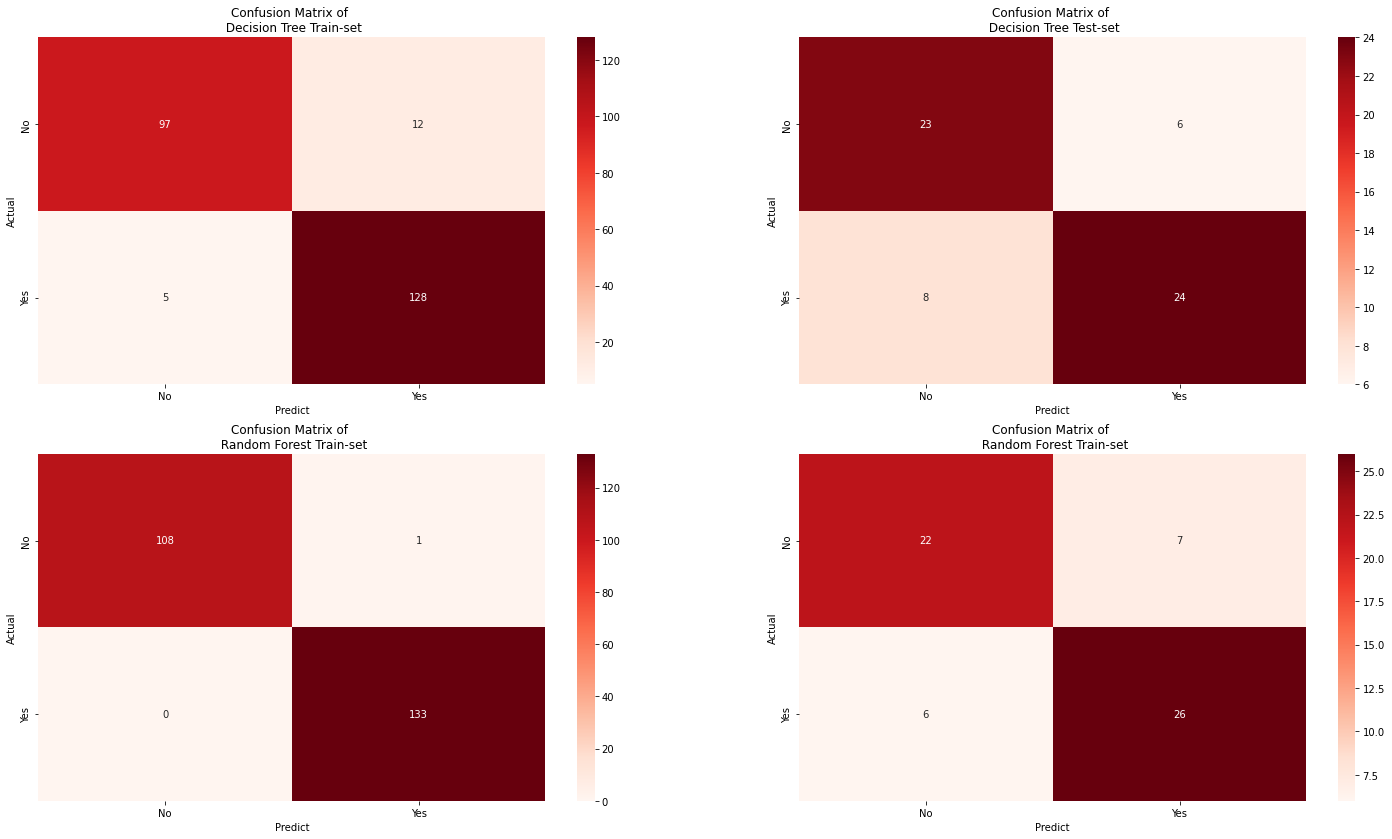

In [181]:
# Confusion Matrix
# Function
modelCM = [confusion_matrix(y_train, y_predTrainDT),
           confusion_matrix(y_test, y_predTestDT),
           confusion_matrix(y_train, y_predTrainRF),
           confusion_matrix(y_test, y_predTestRF)]
modelAlias = ['Decision Tree Train-set', 'Decision Tree Test-set',
              'Random Forest Train-set', 'Random Forest Train-set']

# Visualization
plt.figure(figsize = (25,60))
for i in range(len(modelCM)):
  plt.subplot(8, 2, i+1)
  fig = sns.heatmap(modelCM[i], annot=True, fmt='d', cmap='Reds')
  plt.title(f'Confusion Matrix of \n {modelAlias[i]}')
  fig.set_xticklabels(['No', 'Yes'])
  fig.set_yticklabels(['No', 'Yes'])
  plt.xlabel('Predict')
  plt.ylabel('Actual')
plt.show()

Pada Visualisasi diatas dapat dijabarkan
1. False Negative pada train-set dengan Decision tree ada sebanyak 5 orang, hal ini cukup baik karena model hanya memprediksi kesalahan prediksi sebanyak 5 orang dari 240an orang yang ada didataset.
2. False Negative pada test-set dengan decision tree sedikit lebih banyak yaitu 8 orang dari total 60an data, ini cukup banyak mengingat kesalahan false negative lebih dari 10%, mungkin kita harus mengimprove kesalahan prediksi ini.
3. False Negative pada Train-set dengan Random Forest sangat buruk, karena model tidak dapat memprediksi No, bisa jadi ini ada kesalahan dalam hyperparameter di baseline model
4. False Negative pada test-set dengan random-forest sudah cukup baik, karena kesalahan prediksinya sekitar 10% dari total data test-set
5. Kemungkinan pasien dengan salah prediksi dikarenakan adanya tekanan darah yang tinggi dengan detak jantung diatas rata-rata namun kadar kolesterolnya rendah dengan denyut nadi yang masih normal, sehingga model menjadi salah prediksi

## 8.3 Model Improvement

Random Search

In [235]:
# Decision tree random search
%%time
DTparams = {'max_depth' : [5, None], 
            'max_features' : randint(1, 7),
            'min_samples_leaf' : randint(1, 7),
            'criterion' : ['gini', 'entropy']}
decTreeRS = RandomizedSearchCV(estimator = DecisionTreeClassifier(),
                               param_distributions=DTparams, 
                               n_iter = 30, cv = 5, random_state=19, n_jobs=-1, scoring='f1')

decTreeRS.fit(X_trainFinal, y_train)

CPU times: user 226 ms, sys: 66.1 ms, total: 292 ms
Wall time: 4.6 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fa5dc530f70>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fa5dbcf0af0>},
                   random_state=19, scoring='f1')

In [237]:
# Random Forest random search
%%time
RFparams = {'n_estimators' : [int(x) for x in np.linspace(start=100, stop=1000, num=30)],
            'max_features' : ['auto', 'sqrt', 'log2'],
            'min_samples_leaf' : [2, 4, 6, 8]}
randForRS = RandomizedSearchCV(estimator = RandomForestClassifier(),
                               param_distributions=RFparams, 
                               n_iter = 30, cv = 5, random_state=19, n_jobs=-1, scoring='f1')

randForRS.fit(X_trainFinal, y_train)

CPU times: user 1.9 s, sys: 144 ms, total: 2.05 s
Wall time: 2min 37s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'n_estimators': [100, 131, 162, 193,
                                                         224, 255, 286, 317,
                                                         348, 379, 410, 441,
                                                         472, 503, 534, 565,
                                                         596, 627, 658, 689,
                                                         720, 751, 782, 813,
                                                         844, 875, 906, 937,
                                                         968, 1000]},
                   random_state=19, scoring='f1')

In [238]:
# Trainning improvement
y_predTrainImpDT = decTreeRS.predict(X_trainFinal)
y_predTrainImpRF = randForRS.predict(X_trainFinal)

In [239]:
# Report
print('Model improvement Decision Tree with Random Search : ' )
print(classification_report(y_train, y_predTrainImpDT))
print('')
print('Model improvement Random Forest with Random Search : ' )
print(classification_report(y_train, y_predTrainImpRF))

Model improvement Decision Tree with Random Search : 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       109
           1       0.92      0.84      0.88       133

    accuracy                           0.87       242
   macro avg       0.87      0.88      0.87       242
weighted avg       0.88      0.87      0.87       242


Model improvement Random Forest with Random Search : 
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       109
           1       0.90      0.96      0.93       133

    accuracy                           0.92       242
   macro avg       0.93      0.92      0.92       242
weighted avg       0.92      0.92      0.92       242



# **9 - Model Inference**

---

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [220]:
# get data inference
infData = data.sample(20, random_state=19)

# Reseting index
infData = infData.reset_index()

# Display
infData

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,137,62,Male,1,128,208,1,0,140,0,0.0,Upsloping,0.0,Normal,1
1,27,51,Male,2,110,175,0,1,123,0,0.6,Upsloping,0.0,Normal,1
2,8,52,Male,2,172,199,1,1,162,0,0.5,Upsloping,0.0,Reversible defect,1
3,189,41,Male,0,110,172,0,0,158,0,0.0,Upsloping,0.0,Reversible defect,0
4,138,57,Male,0,110,201,0,1,126,1,1.5,Flat,0.0,Fixed defect,1
5,251,43,Male,0,132,247,1,0,143,1,0.1,Flat,NaN,Reversible defect,0
6,208,49,Male,2,120,188,0,1,139,0,2.0,Flat,3.0,Reversible defect,0
7,205,52,Male,0,128,255,0,1,161,1,0.0,Upsloping,1.0,Reversible defect,0
8,49,53,Female,0,138,234,0,0,160,0,0.0,Upsloping,0.0,Normal,1
9,24,40,Male,3,140,199,0,1,178,1,1.4,Upsloping,0.0,Reversible defect,1


In [221]:
# Drop column index
infData.drop(columns=['index'], axis=1, inplace=True)

# Display
infData

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,62,Male,1,128,208,1,0,140,0,0.0,Upsloping,0.0,Normal,1
1,51,Male,2,110,175,0,1,123,0,0.6,Upsloping,0.0,Normal,1
2,52,Male,2,172,199,1,1,162,0,0.5,Upsloping,0.0,Reversible defect,1
3,41,Male,0,110,172,0,0,158,0,0.0,Upsloping,0.0,Reversible defect,0
4,57,Male,0,110,201,0,1,126,1,1.5,Flat,0.0,Fixed defect,1
5,43,Male,0,132,247,1,0,143,1,0.1,Flat,NaN,Reversible defect,0
6,49,Male,2,120,188,0,1,139,0,2.0,Flat,3.0,Reversible defect,0
7,52,Male,0,128,255,0,1,161,1,0.0,Upsloping,1.0,Reversible defect,0
8,53,Female,0,138,234,0,0,160,0,0.0,Upsloping,0.0,Normal,1
9,40,Male,3,140,199,0,1,178,1,1.4,Upsloping,0.0,Reversible defect,1


In [222]:
# Missing value
mean_ca = infData['ca'].mean()

# imputing
infData['ca'].fillna(mean_ca, inplace=True)

# Display
infData.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [223]:
# Split numerical and categorical
infDataNum = infData[numCol]
infDataCat = infData[catCol]

In [224]:
# Feature Scaling and Encoding
# Numerical Scaling
infDataScaled = scaler.transform(infDataNum)

# Categorical encoder
infDataCat['sex_enc'] = encoder.fit_transform(infDataCat['sex'])
infDataCat['slope_enc'] = encoder.fit_transform(infDataCat['slope'])
infDataCat['thal_enc'] = encoder.fit_transform(infDataCat['thal'])

# Drop column
infDataCat.drop(columns=['sex', 'slope', 'thal'], axis=1, inplace=True)

In [225]:
# Concate data
infDataFinal = np.concatenate([infDataScaled, infDataCat], axis=1)

## Model Prediction using Decision Tree and Random Forest

In [226]:
# Decision tree modeling
y_predInfDT = decTree.predict(infDataFinal)

# Random Forest modeling
y_predInfRF = randFor.predict(infDataFinal)

# Display
print('Model predict using Decision Tree : ')
print(y_predInfDT)
print('')
print('Model predict using Random Forest : ')
print(y_predInfRF)

Model predict using Decision Tree : 
[1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0]

Model predict using Random Forest : 
[1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0]


In [227]:
# Create dataframe prediction
y_predInfDT = pd.DataFrame(y_predInfDT, columns=['Predict - DT'])
y_predInfRF = pd.DataFrame(y_predInfRF, columns=['Predict - RF'])

In [228]:
# Grouping data inference with decistion tree prediction
infDataFinalDT = pd.concat([infData, y_predInfDT], axis=1)

# Display
infDataFinalDT

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Predict - DT
0,62,Male,1,128,208,1,0,140,0,0.0,Upsloping,0.000000,Normal,1,1
1,51,Male,2,110,175,0,1,123,0,0.6,Upsloping,0.000000,Normal,1,1
2,52,Male,2,172,199,1,1,162,0,0.5,Upsloping,0.000000,Reversible defect,1,1
3,41,Male,0,110,172,0,0,158,0,0.0,Upsloping,0.000000,Reversible defect,0,1
4,57,Male,0,110,201,0,1,126,1,1.5,Flat,0.000000,Fixed defect,1,1
5,43,Male,0,132,247,1,0,143,1,0.1,Flat,0.444444,Reversible defect,0,0
6,49,Male,2,120,188,0,1,139,0,2.0,Flat,3.000000,Reversible defect,0,0
7,52,Male,0,128,255,0,1,161,1,0.0,Upsloping,1.000000,Reversible defect,0,0
8,53,Female,0,138,234,0,0,160,0,0.0,Upsloping,0.000000,Normal,1,1
9,40,Male,3,140,199,0,1,178,1,1.4,Upsloping,0.000000,Reversible defect,1,1


In [229]:
# Grouping data inference with decistion tree prediction
infDataFinalRF = pd.concat([infData, y_predInfRF], axis=1)

# Display
infDataFinalRF

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Predict - RF
0,62,Male,1,128,208,1,0,140,0,0.0,Upsloping,0.000000,Normal,1,1
1,51,Male,2,110,175,0,1,123,0,0.6,Upsloping,0.000000,Normal,1,1
2,52,Male,2,172,199,1,1,162,0,0.5,Upsloping,0.000000,Reversible defect,1,1
3,41,Male,0,110,172,0,0,158,0,0.0,Upsloping,0.000000,Reversible defect,0,1
4,57,Male,0,110,201,0,1,126,1,1.5,Flat,0.000000,Fixed defect,1,0
5,43,Male,0,132,247,1,0,143,1,0.1,Flat,0.444444,Reversible defect,0,0
6,49,Male,2,120,188,0,1,139,0,2.0,Flat,3.000000,Reversible defect,0,0
7,52,Male,0,128,255,0,1,161,1,0.0,Upsloping,1.000000,Reversible defect,0,0
8,53,Female,0,138,234,0,0,160,0,0.0,Upsloping,0.000000,Normal,1,1
9,40,Male,3,140,199,0,1,178,1,1.4,Upsloping,0.000000,Reversible defect,1,1


# 10 - Pengambilan Kesimpulan

---


Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

Dari data diatas dapat disimpulkan bahwa : 
1. Accuracy score train dari decision tree sebesar  0.9297520661157025 dan Accuracy score test sebesar 0.7704918032786885 ini menunjukan bahwa model sudah cukup baik untuk membuat prediksi
2. Accuracy score train dari Random Forest sebesar 0.9958677685950413
dan Accuracy score test sebesar 0.7868852459016393 ini juga menunjukan bahwa model sudah cukup baik untuk membuat prediksi

3. model masih dapat diimprove dengan menggunakan randomized search method
dengan nilai akurasi 87% di decision Tree dan 92% persen di Random Forest